# Importing libraries 

In [1]:
# !pip install catboost
# !pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Dataset

In [4]:
df = pd.read_csv("Housing.csv")

In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
383,3570000,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
45,7560000,6000,3,2,3,yes,no,no,no,yes,0,no,semi-furnished
223,4760000,6321,3,1,2,yes,no,yes,no,yes,1,no,furnished
240,4585000,3840,3,1,2,yes,no,no,no,no,1,yes,semi-furnished
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished
418,3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished
280,4270000,6360,2,1,2,yes,no,no,no,no,0,no,unfurnished
247,4550000,8400,4,1,4,yes,no,no,no,no,3,no,unfurnished


In [7]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.shape # data shape

(545, 13)

In [9]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.duplicated().sum() # duplicate values check

0

In [12]:
df.corr() # correlations between data/

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [13]:
data = df.copy()

# ANALYSIS

# Bar Plot

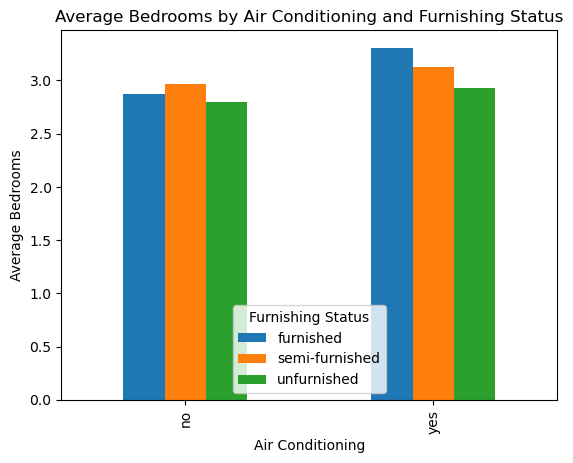

In [14]:
grouped_df = df.groupby(['airconditioning', 'furnishingstatus'])['bedrooms'].mean().unstack()
# Plotting the bar graph
grouped_df.plot(kind='bar')

# Adding labels and title
plt.xlabel('Air Conditioning')
plt.ylabel('Average Bedrooms')
plt.title('Average Bedrooms by Air Conditioning and Furnishing Status')

# Displaying the legend
plt.legend(title='Furnishing Status', loc='lower center')

# Show the plot
plt.show()

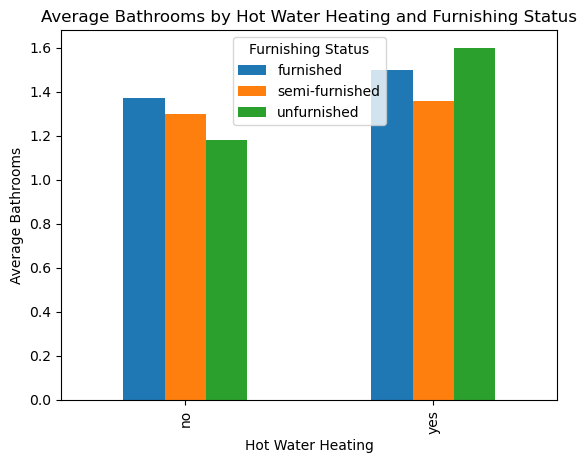

In [15]:
# Grouping by 'hotwaterheating' and 'furnishingstatus' and calculating the mean of 'bathrooms'
grouped_df = df.groupby(['hotwaterheating', 'furnishingstatus'])['bathrooms'].mean().unstack()

# Plotting the bar graph
grouped_df.plot(kind='bar')

# Adding labels and title
plt.xlabel('Hot Water Heating')
plt.ylabel('Average Bathrooms')
plt.title('Average Bathrooms by Hot Water Heating and Furnishing Status')

# Displaying the legend
plt.legend(title='Furnishing Status', loc='upper center')

# Show the plot
plt.show()

# Box Plot


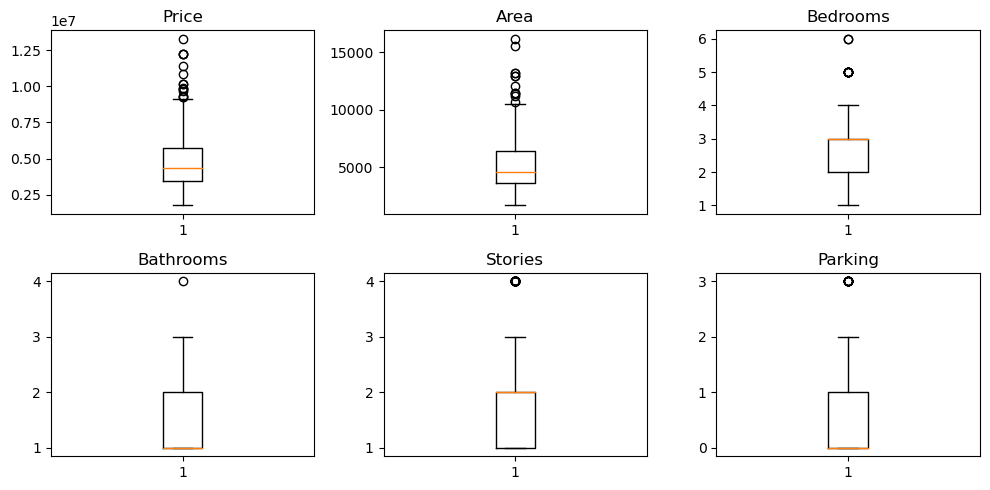

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Box plot for 'price'
axs[0, 0].boxplot(df['price'])
axs[0, 0].set_title('Price')

# Box plot for 'area'
axs[0, 1].boxplot(df['area'])
axs[0, 1].set_title('Area')

# Box plot for 'bedrooms'
axs[0, 2].boxplot(df['bedrooms'])
axs[0, 2].set_title('Bedrooms')

# Box plot for 'bathrooms'
axs[1, 0].boxplot(df['bathrooms'])
axs[1, 0].set_title('Bathrooms')

# Box plot for 'stories'
axs[1, 1].boxplot(df['stories'])
axs[1, 1].set_title('Stories')

# Box plot for 'parking'
axs[1, 2].boxplot(df['parking'])
axs[1, 2].set_title('Parking')

plt.tight_layout()
plt.show()

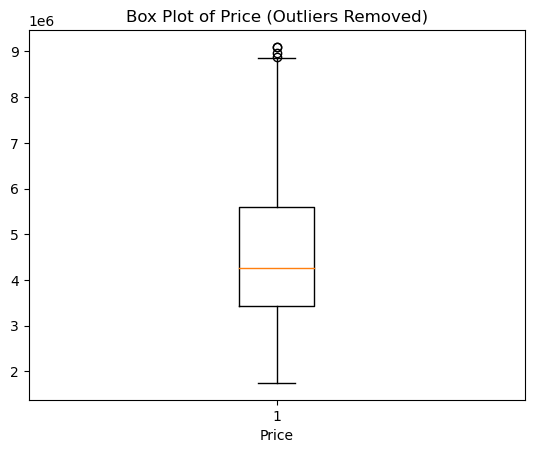

In [17]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

# Create a box plot after removing outliers
plt.boxplot(df['price'])
plt.title('Box Plot of Price (Outliers Removed)')
plt.xlabel('Price')
plt.show()

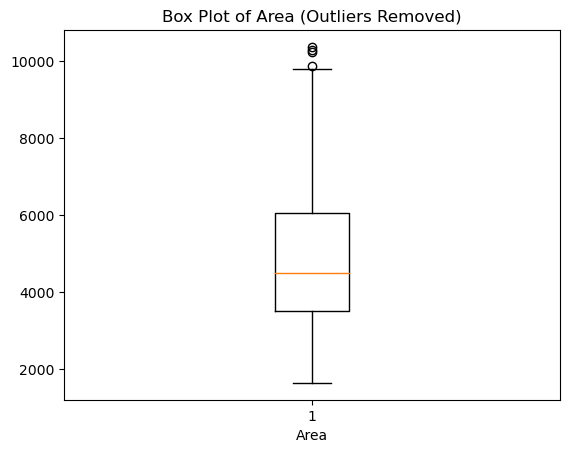

In [18]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 * IQR)]

# Create a box plot after removing outliers
plt.boxplot(df['area'])
plt.title('Box Plot of Area (Outliers Removed)')
plt.xlabel('Area')
plt.show()

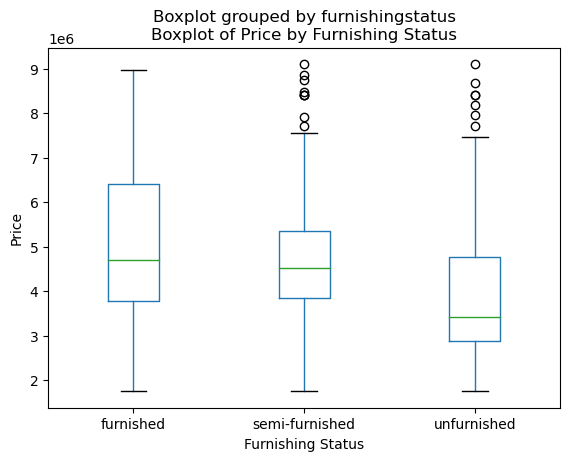

In [19]:
df.boxplot(column='price', by='furnishingstatus', grid=False)

plt.title('Boxplot of Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')

plt.show()

<Axes: xlabel='furnishingstatus', ylabel='price'>

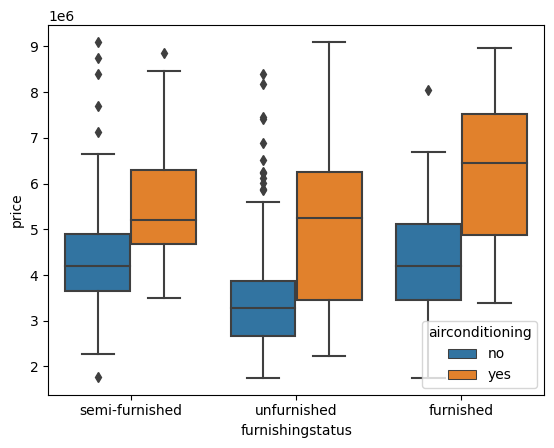

In [20]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

# Distplot


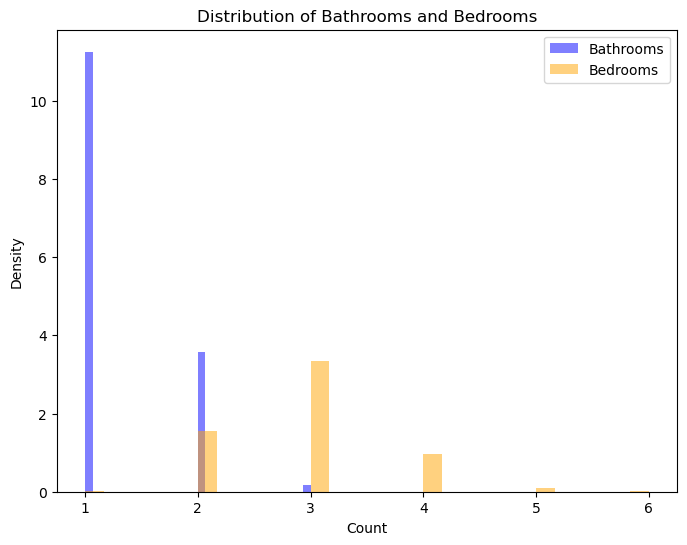

In [21]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Plotting the distribution of 'bathrooms'
plt.hist(df["bathrooms"], bins=30, alpha=0.5, label='Bathrooms', color='blue', density=True)

# Plotting the distribution of 'bedrooms'
plt.hist(df["bedrooms"], bins=30, alpha=0.5, label='Bedrooms', color='orange', density=True)

plt.title('Distribution of Bathrooms and Bedrooms')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()

plt.show()

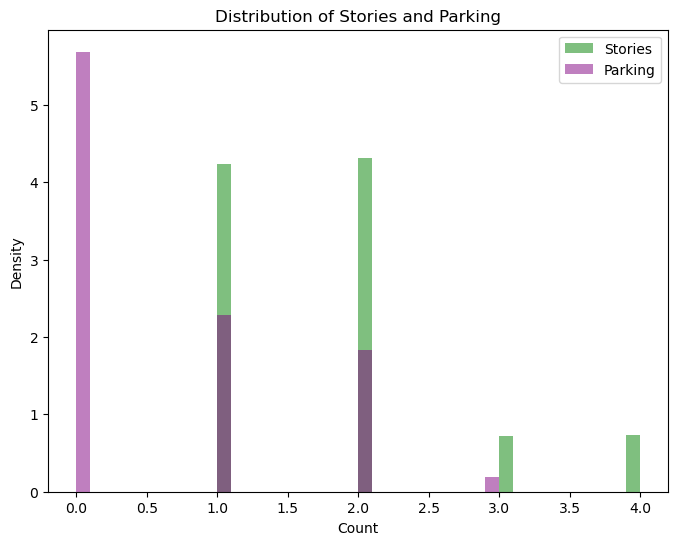

In [22]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Plotting the distribution of 'stories'
plt.hist(df["stories"], bins=30, alpha=0.5, label='Stories', color='green', density=True)

# Plotting the distribution of 'parking'
plt.hist(df["parking"], bins=30, alpha=0.5, label='Parking', color='purple', density=True)

plt.title('Distribution of Stories and Parking')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()

plt.show()

# Heatmap

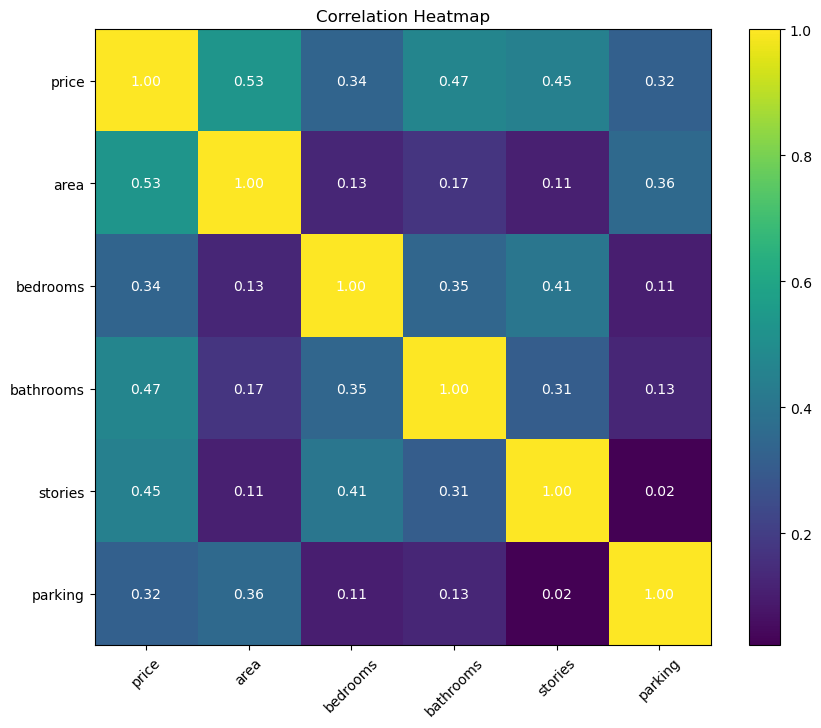

In [23]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Adding annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = "{:.2f}".format(correlation_matrix.iloc[i, j])
        plt.text(j, i, text, ha='center', va='center', color='w')

plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot


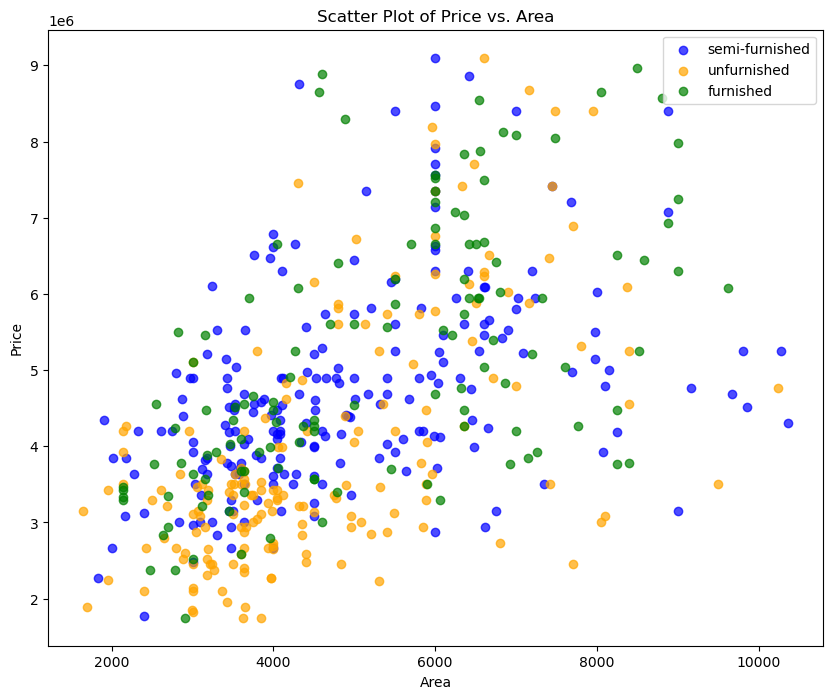

In [24]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for 'furnishingstatus'
unique_statuses = df['furnishingstatus'].unique()
colors = ['blue', 'orange', 'green']  # You can customize the colors based on your preference

for i, status in enumerate(unique_statuses):
    subset = df[df['furnishingstatus'] == status]
    plt.scatter(subset['area'], subset['price'], label=status, color=colors[i], alpha=0.7)

plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# Pair Plot


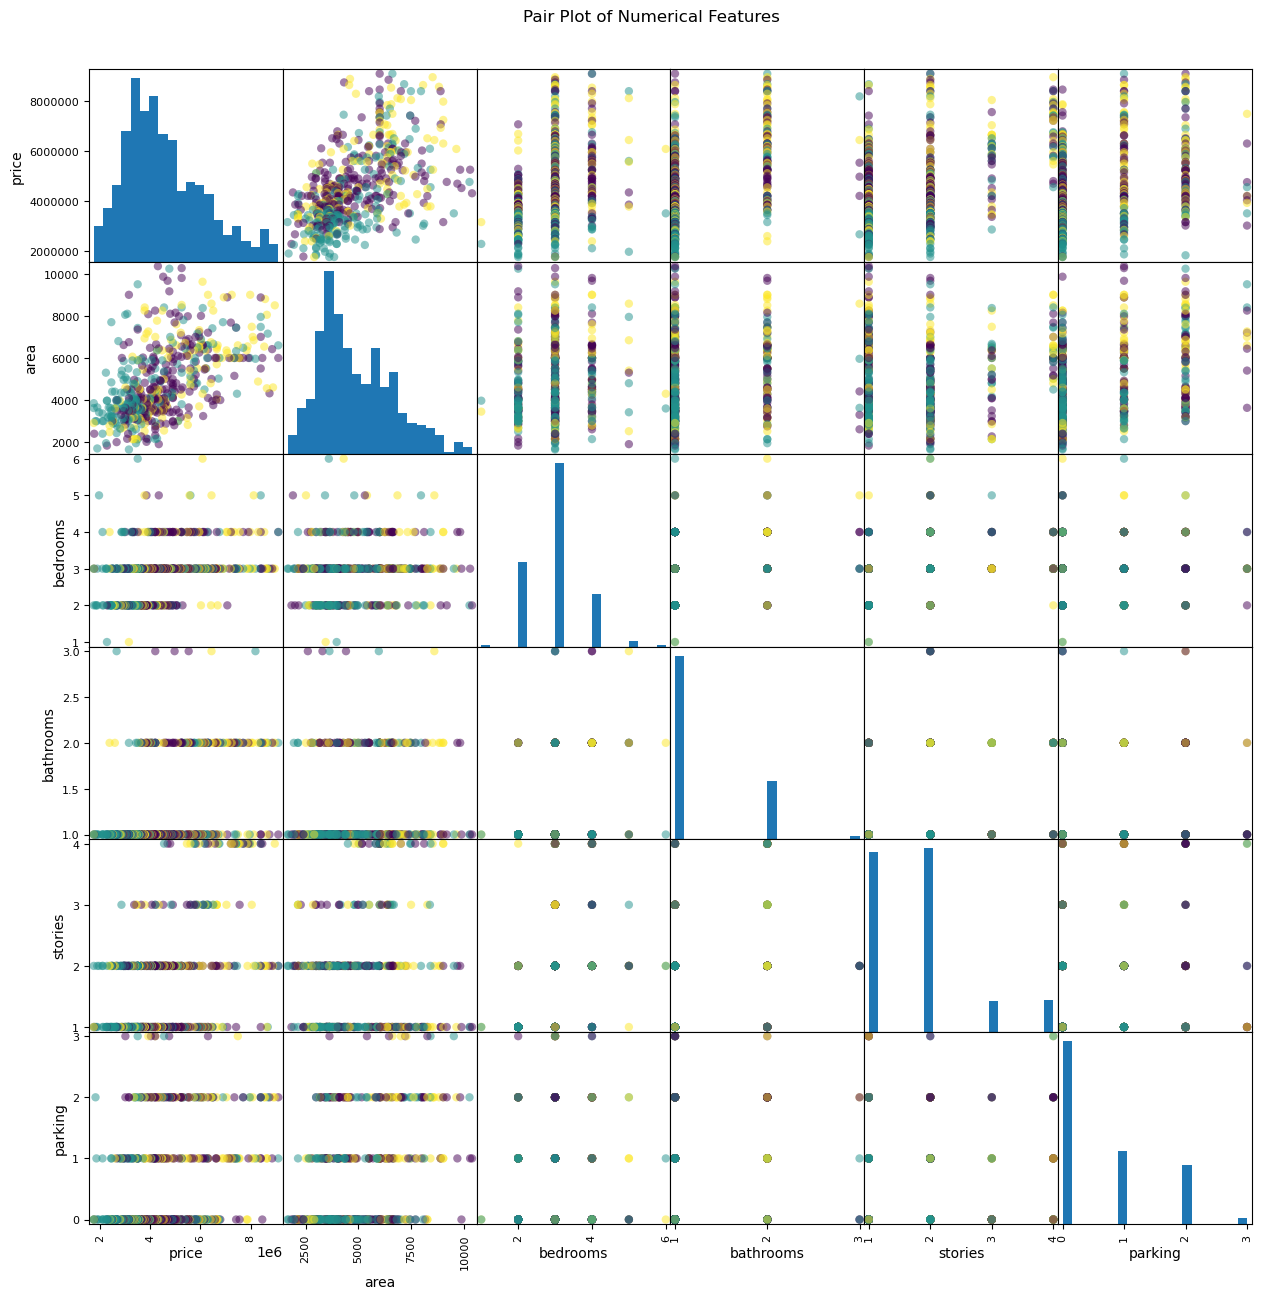

In [25]:



# Assuming df is your DataFrame
# Drop non-numeric columns if necessary
numeric_df = df.select_dtypes(include='number')

# Add color based on 'furnishingstatus'
colors = pd.factorize(df['furnishingstatus'])[0]

scatter_matrix(numeric_df, c=colors, figsize=(15, 15), marker='o', hist_kwds={'bins': 20})

plt.suptitle('Pair Plot of Numerical Features', y=0.92)
plt.show()

# Feature Engineering

In [26]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [27]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Feature Scaling

In [28]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Training

In [29]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),            
    'XGRF Regressor' : xgb.XGBRFRegressor(),   
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    'LGBM Reg' : LGBMRegressor(),
    'Cat Boost' : CatBoostRegressor()
}

In [30]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 381, number of used features: 13
[LightGBM] [Info] Start training from score 4762406.272966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

123:	learn: 817019.2743634	total: 329ms	remaining: 2.33s
124:	learn: 815814.7199696	total: 331ms	remaining: 2.32s
125:	learn: 813455.3852154	total: 333ms	remaining: 2.31s
126:	learn: 811460.0939266	total: 334ms	remaining: 2.3s
127:	learn: 809376.4600678	total: 335ms	remaining: 2.29s
128:	learn: 806917.7391829	total: 337ms	remaining: 2.27s
129:	learn: 805836.6158276	total: 338ms	remaining: 2.26s
130:	learn: 803562.9463377	total: 339ms	remaining: 2.25s
131:	learn: 802508.8933872	total: 340ms	remaining: 2.24s
132:	learn: 800414.3003674	total: 341ms	remaining: 2.22s
133:	learn: 799145.8072072	total: 342ms	remaining: 2.21s
134:	learn: 796523.9358327	total: 344ms	remaining: 2.2s
135:	learn: 795428.6809602	total: 345ms	remaining: 2.19s
136:	learn: 793609.5303594	total: 346ms	remaining: 2.18s
137:	learn: 791543.5285373	total: 347ms	remaining: 2.17s
138:	learn: 790035.8194526	total: 349ms	remaining: 2.16s
139:	learn: 789385.7895879	total: 350ms	remaining: 2.15s
140:	learn: 786433.8538268	total:

410:	learn: 529542.0784979	total: 685ms	remaining: 982ms
411:	learn: 528811.4266778	total: 687ms	remaining: 980ms
412:	learn: 527854.2236796	total: 688ms	remaining: 978ms
413:	learn: 527190.2055930	total: 689ms	remaining: 975ms
414:	learn: 527010.6911561	total: 690ms	remaining: 973ms
415:	learn: 526103.5219499	total: 691ms	remaining: 971ms
416:	learn: 525895.3498408	total: 693ms	remaining: 969ms
417:	learn: 525486.4179600	total: 694ms	remaining: 967ms
418:	learn: 525307.6024331	total: 695ms	remaining: 964ms
419:	learn: 524898.4758342	total: 697ms	remaining: 962ms
420:	learn: 523860.0875394	total: 698ms	remaining: 960ms
421:	learn: 523819.5349394	total: 699ms	remaining: 957ms
422:	learn: 523642.4043555	total: 700ms	remaining: 955ms
423:	learn: 523002.7476879	total: 702ms	remaining: 953ms
424:	learn: 522958.9000970	total: 703ms	remaining: 951ms
425:	learn: 522776.8597509	total: 704ms	remaining: 949ms
426:	learn: 521763.7428689	total: 705ms	remaining: 946ms
427:	learn: 521377.5501204	tota

562:	learn: 459047.7315966	total: 873ms	remaining: 677ms
563:	learn: 458503.5346657	total: 874ms	remaining: 676ms
564:	learn: 457510.0161238	total: 876ms	remaining: 674ms
565:	learn: 457156.8940202	total: 877ms	remaining: 672ms
566:	learn: 456991.9127313	total: 878ms	remaining: 670ms
567:	learn: 456489.9097371	total: 879ms	remaining: 669ms
568:	learn: 456174.2802569	total: 880ms	remaining: 667ms
569:	learn: 455732.5823845	total: 882ms	remaining: 665ms
570:	learn: 455304.0095195	total: 883ms	remaining: 663ms
571:	learn: 455013.0743103	total: 884ms	remaining: 662ms
572:	learn: 454551.4373020	total: 885ms	remaining: 660ms
573:	learn: 454038.5632592	total: 887ms	remaining: 658ms
574:	learn: 454017.9144265	total: 888ms	remaining: 656ms
575:	learn: 453839.4952891	total: 889ms	remaining: 654ms
576:	learn: 453766.9784129	total: 890ms	remaining: 653ms
577:	learn: 453291.4545228	total: 892ms	remaining: 651ms
578:	learn: 452979.5728540	total: 893ms	remaining: 649ms
579:	learn: 452875.6788030	tota

719:	learn: 403019.0529336	total: 1.05s	remaining: 410ms
720:	learn: 402291.2640394	total: 1.06s	remaining: 409ms
721:	learn: 401798.9454755	total: 1.06s	remaining: 407ms
722:	learn: 401642.7075511	total: 1.06s	remaining: 406ms
723:	learn: 401149.8250224	total: 1.06s	remaining: 405ms
724:	learn: 400781.1311805	total: 1.06s	remaining: 403ms
725:	learn: 400691.9606898	total: 1.06s	remaining: 402ms
726:	learn: 400667.1807327	total: 1.06s	remaining: 400ms
727:	learn: 400449.4348366	total: 1.07s	remaining: 399ms
728:	learn: 400085.7533146	total: 1.07s	remaining: 397ms
729:	learn: 399180.6162106	total: 1.07s	remaining: 395ms
730:	learn: 399077.8596447	total: 1.07s	remaining: 394ms
731:	learn: 398797.4237883	total: 1.07s	remaining: 392ms
732:	learn: 398367.2865356	total: 1.07s	remaining: 391ms
733:	learn: 398345.5803023	total: 1.07s	remaining: 389ms
734:	learn: 397737.2499625	total: 1.07s	remaining: 388ms
735:	learn: 397200.4402106	total: 1.08s	remaining: 386ms
736:	learn: 397025.4223278	tota

874:	learn: 357797.6041649	total: 1.24s	remaining: 178ms
875:	learn: 357725.3390991	total: 1.24s	remaining: 176ms
876:	learn: 357420.9640296	total: 1.25s	remaining: 175ms
877:	learn: 357406.0773607	total: 1.25s	remaining: 173ms
878:	learn: 357151.2610288	total: 1.25s	remaining: 172ms
879:	learn: 357125.4678206	total: 1.25s	remaining: 170ms
880:	learn: 356752.6124977	total: 1.25s	remaining: 169ms
881:	learn: 356552.7137541	total: 1.25s	remaining: 167ms
882:	learn: 355960.1271695	total: 1.25s	remaining: 166ms
883:	learn: 355726.6665641	total: 1.25s	remaining: 165ms
884:	learn: 355698.4377288	total: 1.25s	remaining: 163ms
885:	learn: 355310.6272530	total: 1.26s	remaining: 162ms
886:	learn: 355172.8863250	total: 1.26s	remaining: 160ms
887:	learn: 354909.9073807	total: 1.26s	remaining: 159ms
888:	learn: 354426.5349498	total: 1.26s	remaining: 157ms
889:	learn: 354151.3186359	total: 1.26s	remaining: 156ms
890:	learn: 354132.8261652	total: 1.26s	remaining: 155ms
891:	learn: 354065.4243308	tota

# Model Evaluation

Results for Random Forest Regressor : 
Mean Square Erroe : 1865966195691.2217
R2 Score : 0.5666984015534433


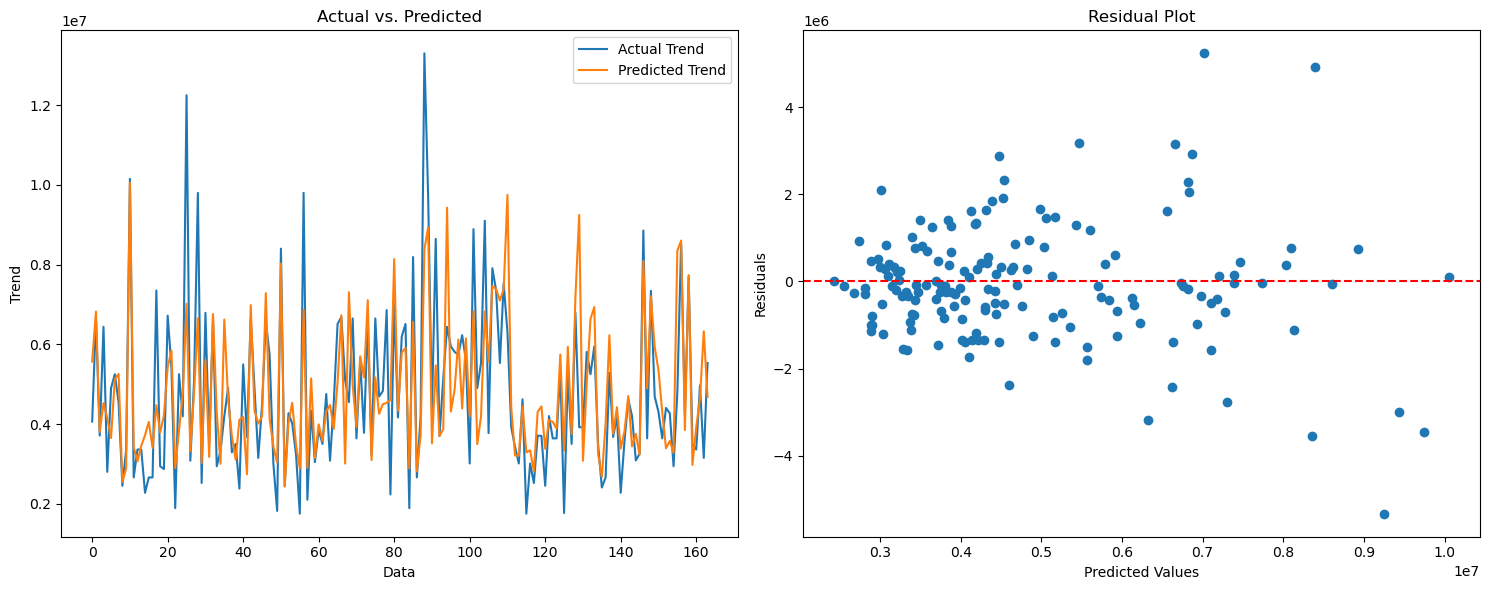

Results for Gradient Boost Regressor : 
Mean Square Erroe : 1595428802596.5706
R2 Score : 0.6295206998020204


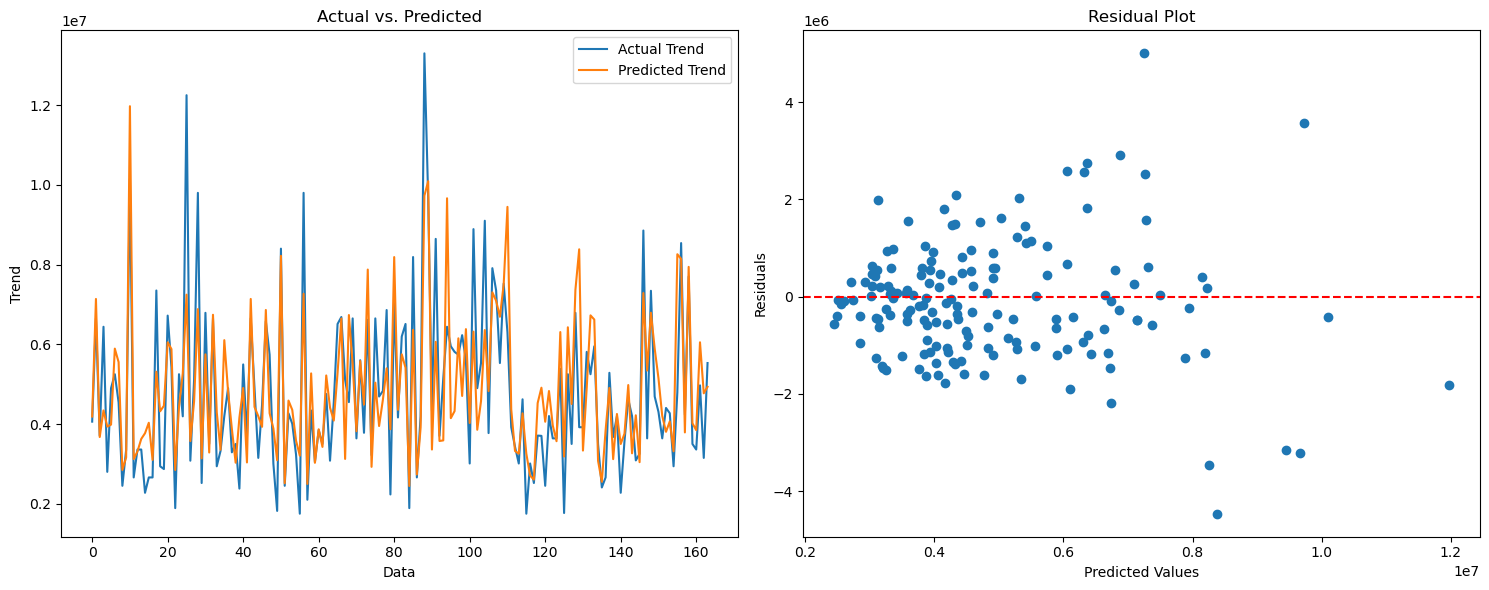

Results for XGBoost : 
Mean Square Erroe : 1655928196173.54
R2 Score : 0.6154719544375646


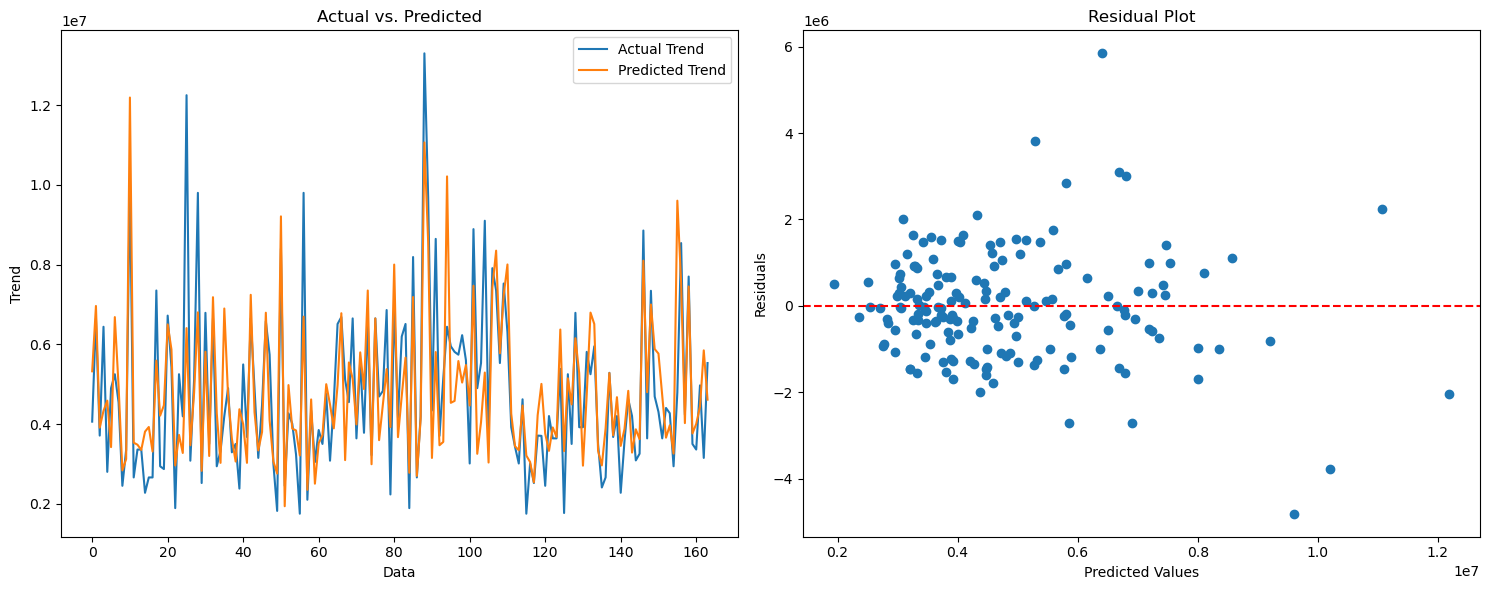

Results for XGRF Regressor : 
Mean Square Erroe : 2158068462839.5576
R2 Score : 0.4988684593189584


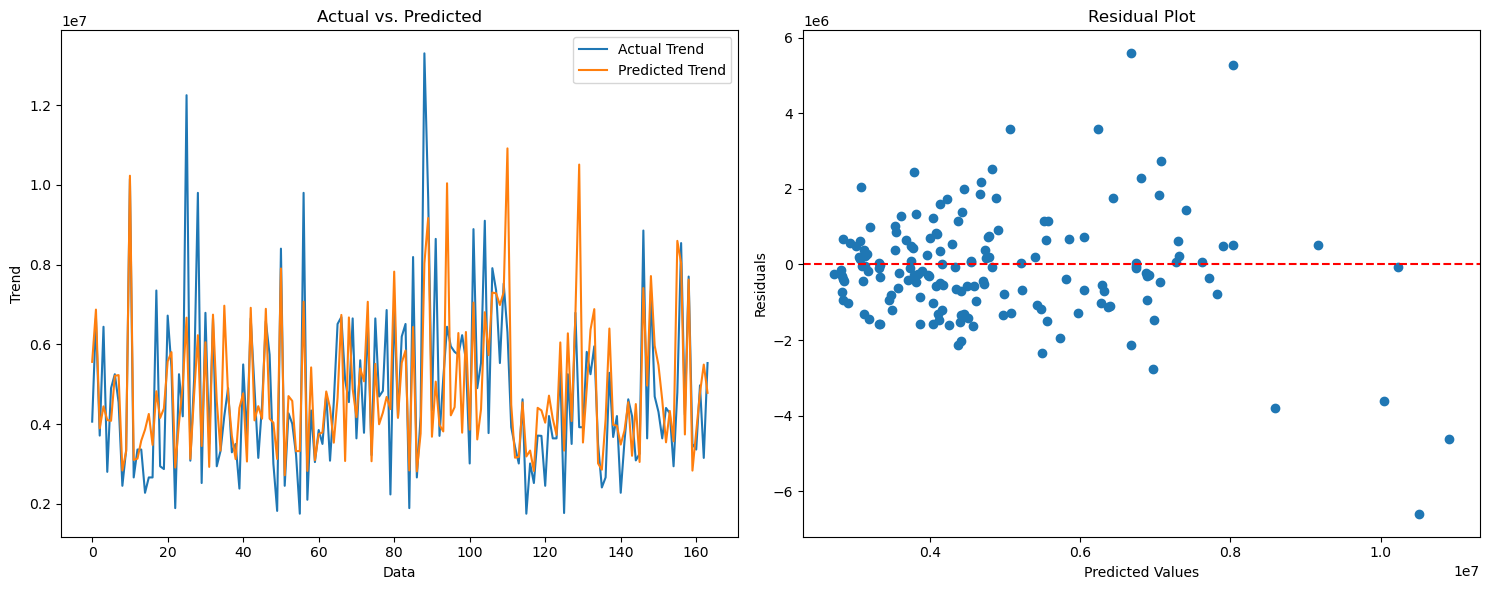

Results for Support Vector regressor : 
Mean Square Erroe : 4462165325262.905
R2 Score : -0.03617277335133684


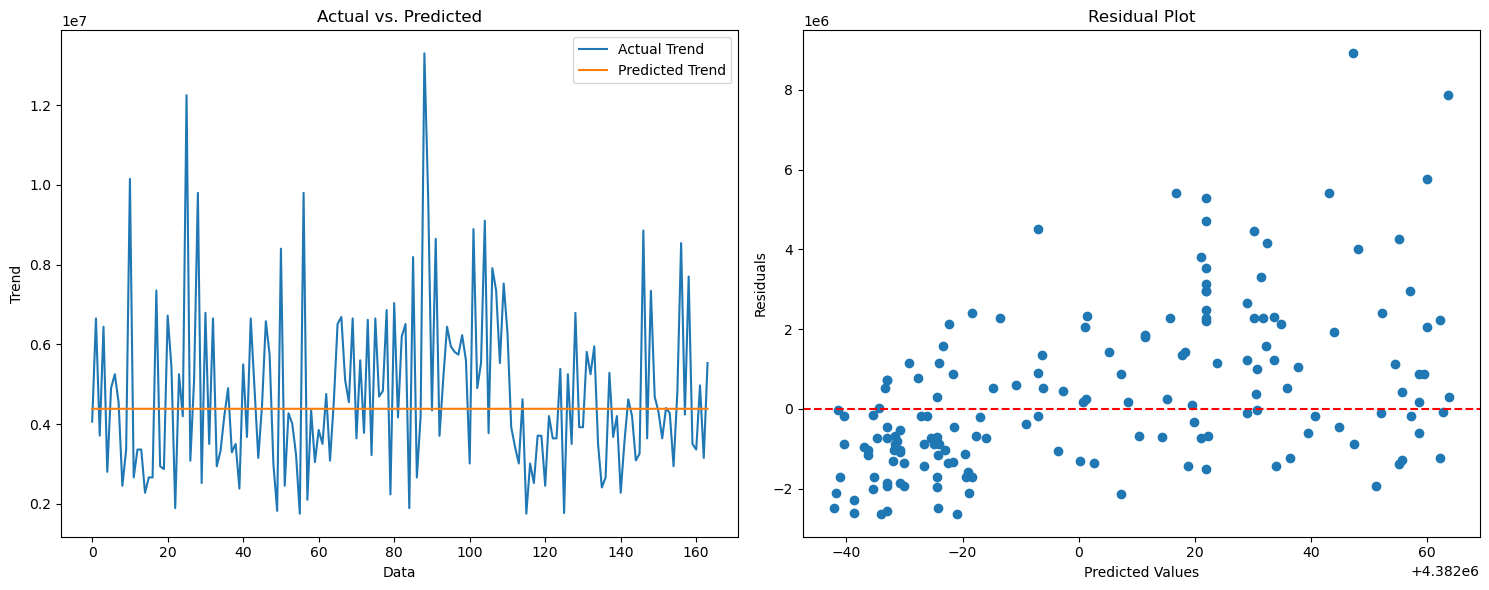

Results for Lasso Reg : 
Mean Square Erroe : 1523021266688.3394
R2 Score : 0.6463346705594011


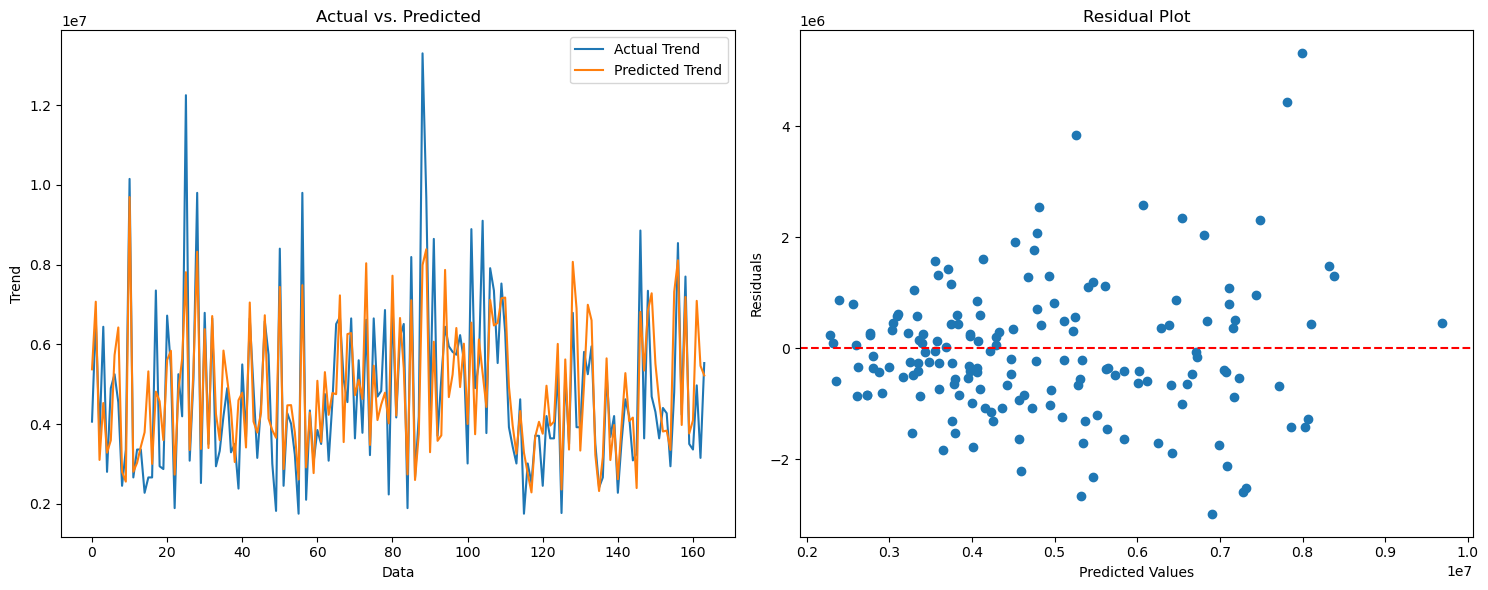

Results for Ridge Reg : 
Mean Square Erroe : 1525354840593.3704
R2 Score : 0.6457927843743898


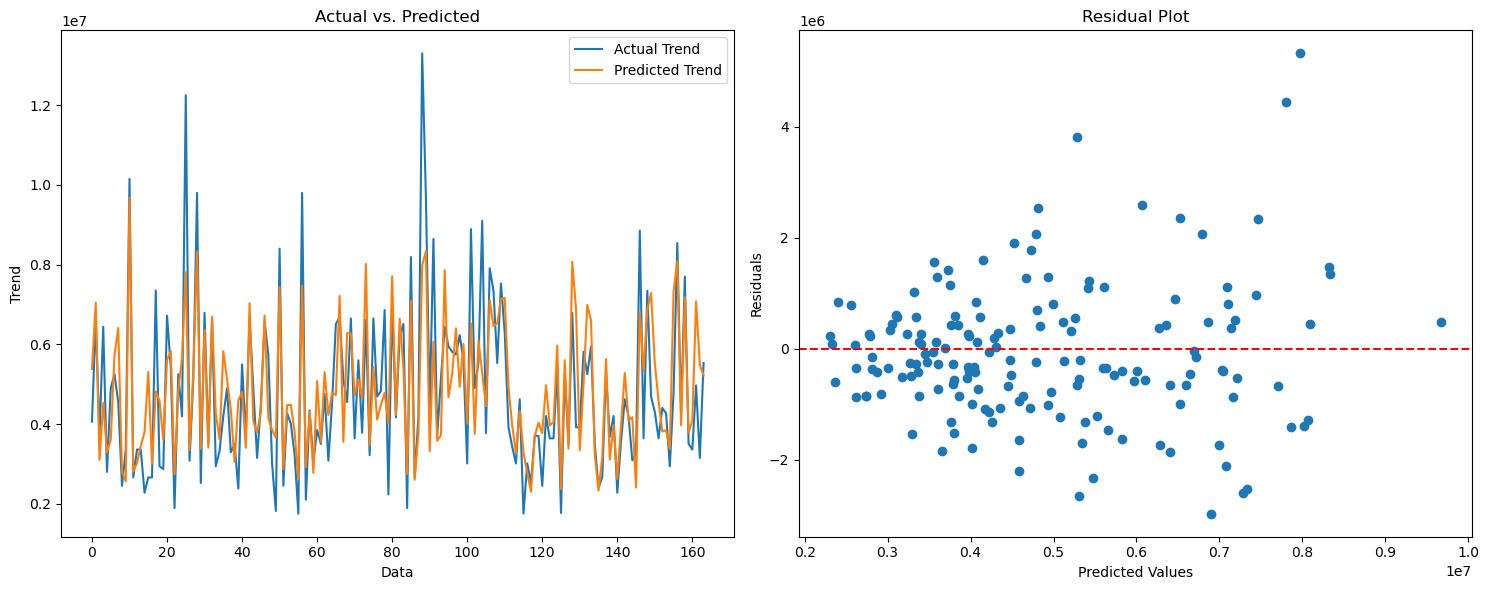

Results for LGBM Reg : 
Mean Square Erroe : 1602977666834.8694
R2 Score : 0.6277677554301107


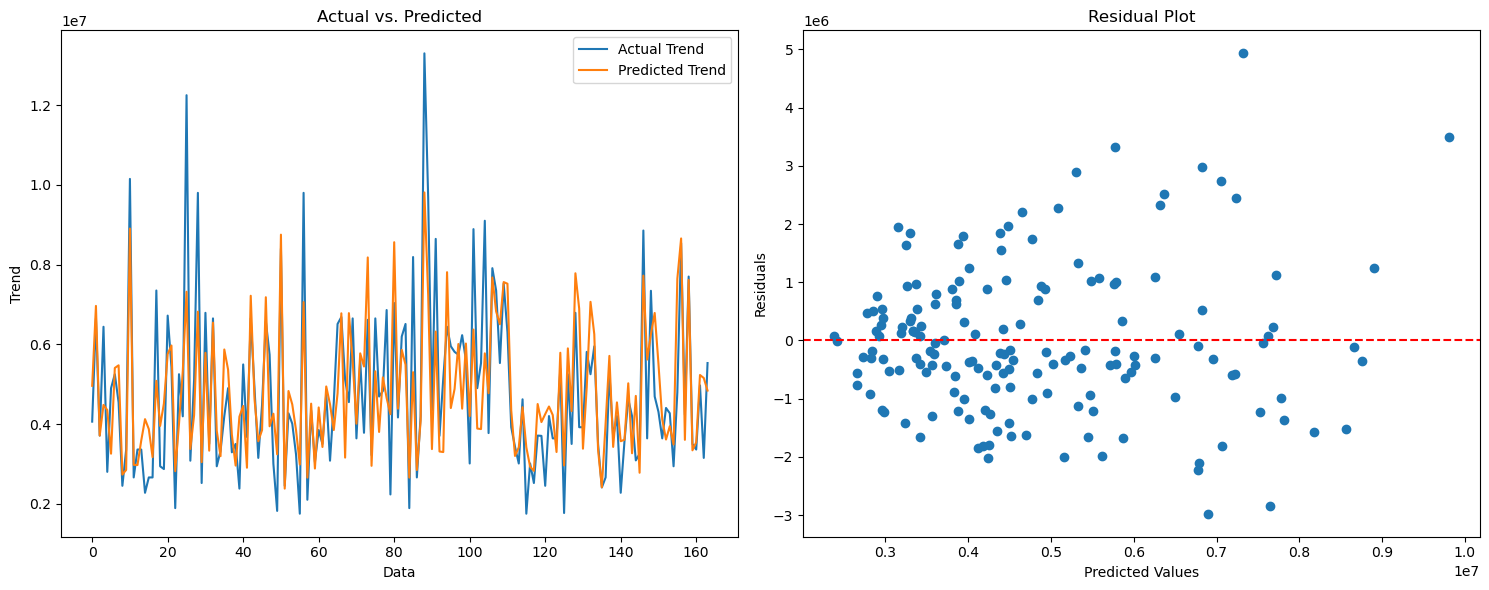

Results for Cat Boost : 
Mean Square Erroe : 1532351539182.4873
R2 Score : 0.6441680600414872


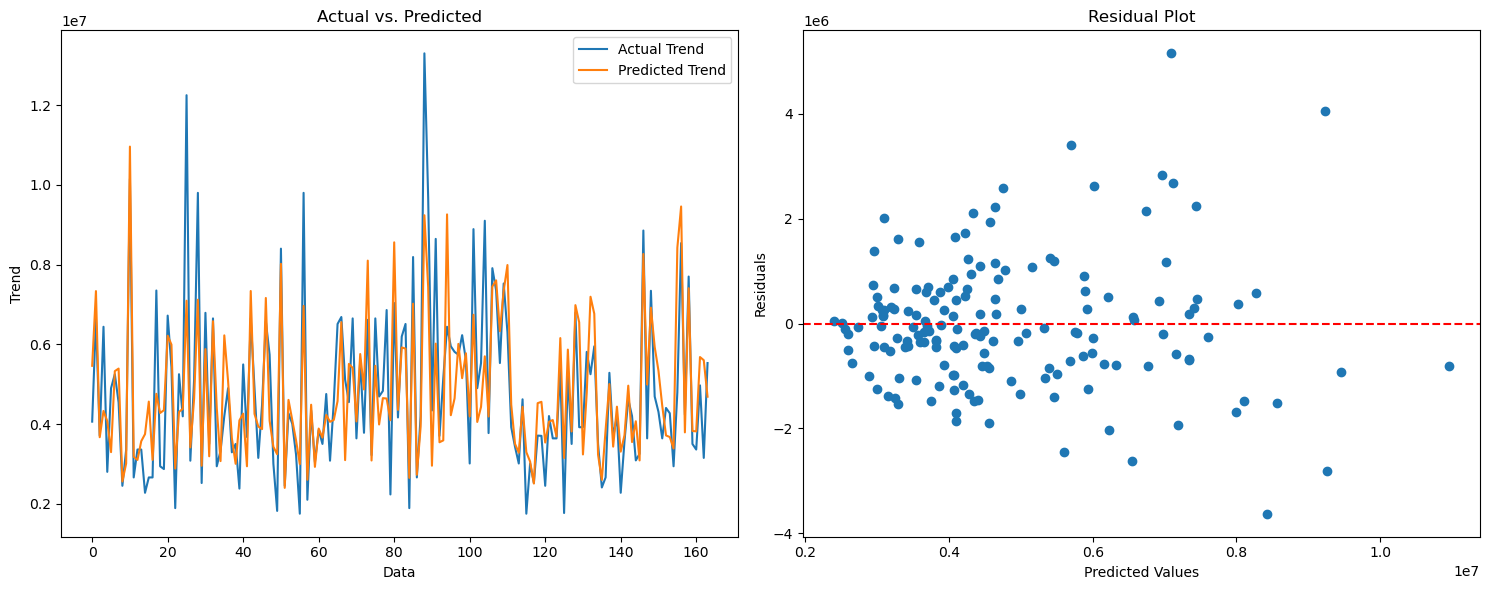

In [31]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [32]:
result = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
result

,Accuracy
Random Forest Regressor,0.566698
Gradient Boost Regressor,0.629521
XGBoost,0.615472
XGRF Regressor,0.498868
Support Vector regressor,-0.036173
Lasso Reg,0.646335
Ridge Reg,0.645793
LGBM Reg,0.627768
Cat Boost,0.644168


# Model Using TensorFlow

In [33]:
data["price_per_area"] = data["price"]/data["area"]

In [34]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models


model = models.Sequential()

# Add input layer
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

# Add one or more hidden layers
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

# Add output layer with one neuron (for regression)
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=90, batch_size=64, validation_split=0.2)

Epoch 1/90
5/5 [==============================] - 3s 137ms/step - loss: 25703986757632.0000 - val_loss: 26239890882560.0000
Epoch 2/90
5/5 [==============================] - 0s 65ms/step - loss: 25603839361024.0000 - val_loss: 25941877194752.0000
Epoch 3/90
5/5 [==============================] - 0s 71ms/step - loss: 24888291098624.0000 - val_loss: 24205248692224.0000
Epoch 4/90
5/5 [==============================] - 0s 70ms/step - loss: 21443012198400.0000 - val_loss: 17198938587136.0000
Epoch 5/90
5/5 [==============================] - 0s 63ms/step - loss: 10760074821632.0000 - val_loss: 2711081713664.0000
Epoch 6/90
5/5 [==============================] - 0s 64ms/step - loss: 5150719082496.0000 - val_loss: 2939671019520.0000
Epoch 7/90
5/5 [==============================] - 0s 63ms/step - loss: 2724753571840.0000 - val_loss: 3851311120384.0000
Epoch 8/90
5/5 [==============================] - 0s 69ms/step - loss: 3472304898048.0000 - val_loss: 3575002169344.0000
Epoch 9/90
5/5 [======

5/5 [==============================] - 0s 62ms/step - loss: 966656262144.0000 - val_loss: 1085320265728.0000
Epoch 69/90
5/5 [==============================] - 0s 65ms/step - loss: 904515420160.0000 - val_loss: 1051580432384.0000
Epoch 70/90
5/5 [==============================] - 0s 62ms/step - loss: 880015179776.0000 - val_loss: 1124688068608.0000
Epoch 71/90
5/5 [==============================] - 0s 68ms/step - loss: 915871629312.0000 - val_loss: 1015545266176.0000
Epoch 72/90
5/5 [==============================] - 0s 67ms/step - loss: 940847071232.0000 - val_loss: 1055533760512.0000
Epoch 73/90
5/5 [==============================] - 0s 65ms/step - loss: 947322159104.0000 - val_loss: 997730877440.0000
Epoch 74/90
5/5 [==============================] - 0s 64ms/step - loss: 881775017984.0000 - val_loss: 999217889280.0000
Epoch 75/90
5/5 [==============================] - 0s 62ms/step - loss: 865062420480.0000 - val_loss: 991348129792.0000
Epoch 76/90
5/5 [==============================

6/6 [==============================] - 0s 7ms/step
Results for Neural Network Model:
Mean Squared Error: 1135250535648.8982
R2 Score: 0.7363800732993678


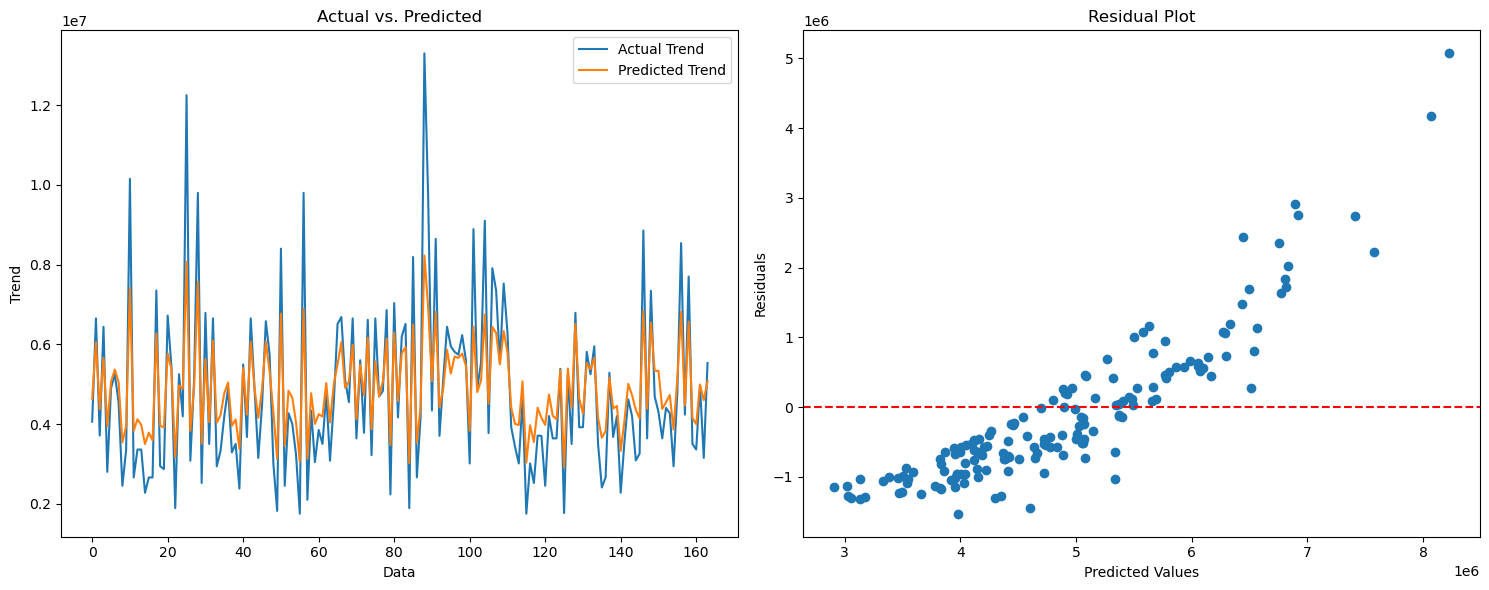

In [37]:
# Now you can use the trained model for predictions
predictions = model.predict(X_test).flatten()  # Flatten predictions to 1D

# Evaluate and visualize the results
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Results for Neural Network Model:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs. Predicted values
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), predictions, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs. Predicted')

# Plot Residuals
residuals = y_test - predictions

plt.subplot(1, 2, 2)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [38]:
# Model Build using Tensorflow - accuracy 73.54 %

# Top 3 Regressor based on accuracy
# Lasso Reg 64.63 %
# Ridge Reg 64.57 %
# Cat Boost 64.41 %